In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns


In [2]:
data = pd.read_csv("bmi.csv")


In [3]:
data.head()


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
data.tail()


,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [5]:
data.describe()


,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [6]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split


In [7]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])


In [8]:
data.head()


,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [9]:
bins = (-1,0,1,2,3,4,5)
health = ['Malnourished','Underweight','fit','Slightly Overweight','Overwieght','Extremely Overweight']
data['Index']=pd.cut(data['Index'],bins=bins,labels=health)


In [10]:
data.head()


,Gender,Height,Weight,Index
0,1,174,96,Overwieght
1,1,189,87,fit
2,0,185,110,Overwieght
3,0,195,104,Slightly Overweight
4,1,149,61,Slightly Overweight


In [11]:
data['Index'].value_counts()


Extremely Overweight    198
Overwieght              130
fit                      69
Slightly Overweight      68
Underweight              22
Malnourished             13
Name: Index, dtype: int64

In [12]:
data['Gender'].value_counts()


0    255
1    245
Name: Gender, dtype: int64

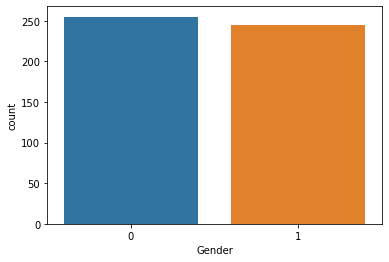

In [13]:
sns.countplot(data['Gender'])


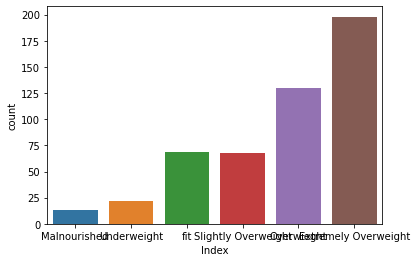

In [14]:
sns.countplot(data['Index'])


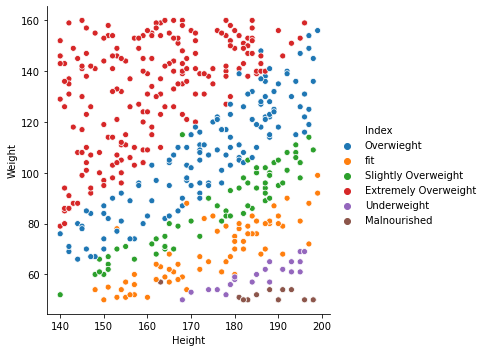

In [16]:
sns.relplot(x="Height",y="Weight",hue="Index",data=data)


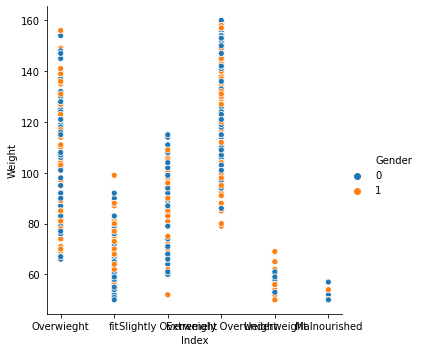

In [17]:
sns.relplot(x="Index",y="Weight",hue="Gender",data=data)


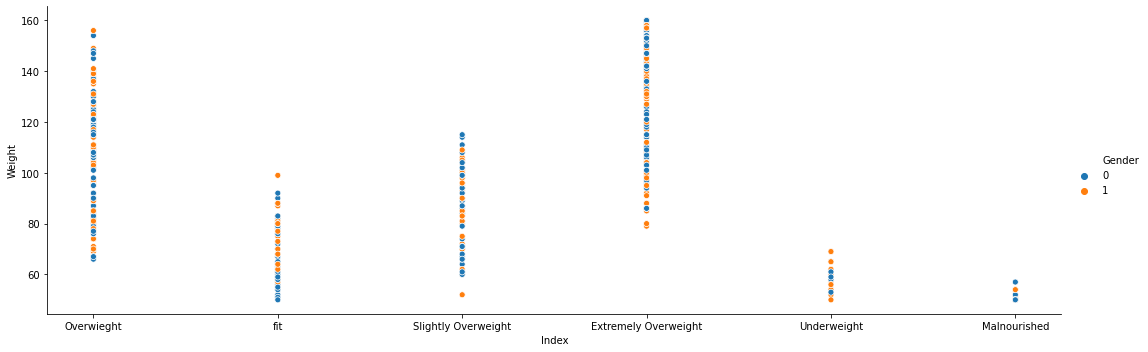

In [18]:
sns.relplot(x="Index",y="Weight",hue="Gender",height=5,aspect=3,data=data)


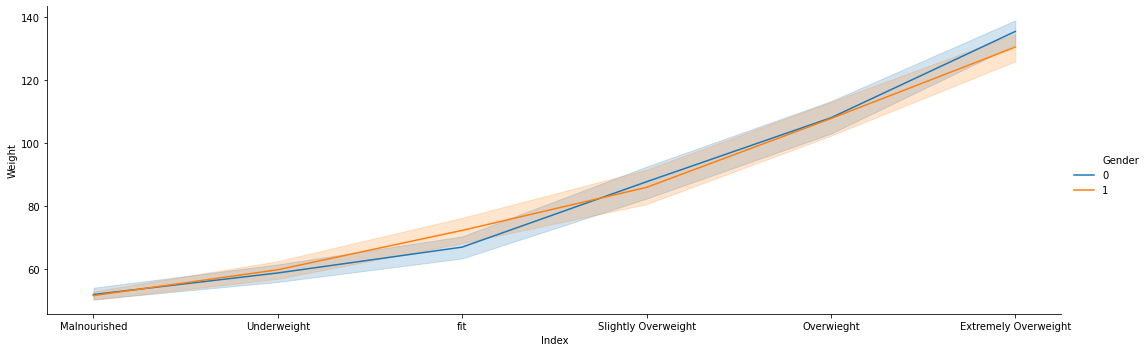

In [19]:
sns.relplot(x="Index",y="Weight",hue="Gender",height=5,aspect=3,data=data,kind='line')


In [21]:
X = data.drop('Index',axis=1)
y = data['Index']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [22]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)


In [23]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)


In [25]:
print(classification_report(y_test,pred))


                      precision    recall  f1-score   support

Extremely Overweight       0.88      0.97      0.92        36
        Malnourished       0.00      0.00      0.00         3
          Overwieght       0.96      0.78      0.86        32
 Slightly Overweight       0.78      0.93      0.85        15
         Underweight       0.60      0.75      0.67         4
                 fit       0.73      0.80      0.76        10

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



In [26]:
print(confusion_matrix(y_test,pred))


[[35  0  1  0  0  0]
 [ 0  0  0  0  2  1]
 [ 5  0 25  2  0  0]
 [ 0  0  0 14  0  1]
 [ 0  0  0  0  3  1]
 [ 0  0  0  2  0  8]]


In [28]:
print(accuracy_score(y_test,pred))


0.85


In [29]:
a = [[0,160,48]]
a = s.transform(a)
b = clf.predict(a)


In [30]:
b


array(['fit'], dtype=object)

In [31]:
data


,Gender,Height,Weight,Index
0,1,174,96,Overwieght
1,1,189,87,fit
2,0,185,110,Overwieght
3,0,195,104,Slightly Overweight
4,1,149,61,Slightly Overweight
...,...,...,...,...
495,0,150,153,Extremely Overweight
496,0,184,121,Overwieght
497,0,141,136,Extremely Overweight
498,1,150,95,Extremely Overweight
